# Titanic Data Analysis 

## Descreption

- How many survivors from the Titanic disaster? 
- Did the passengers class play a role on the number of survivors? what about their sex? 
- What were the ages of the passengers? does it have any relationship with number of survivors? 
- Was it true that people died to survive who they love? 
and other questions we are trying to answer in our analysis ...

## Dataset

I used `Titanic Dataset` from Kaggle: https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('train.csv', index_col=0)

In [3]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 11)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
titanic.Survived.value_counts()/titanic.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [8]:
titanic_survived = titanic.loc[titanic.Survived == 1]

Number of unsurvived people: 549 out of 891 (61.6%)  \
Number of survived people: 342 out of 891 (38.4%)

### Investigate the `Pclass` (passengers class) of the passengers on the number of survived

In [9]:
class_grb = titanic.groupby('Pclass')
cnt = class_grb.Survived.count()
cnt

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [10]:
class_grb.Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [11]:
class_grb.Survived.value_counts()/cnt

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

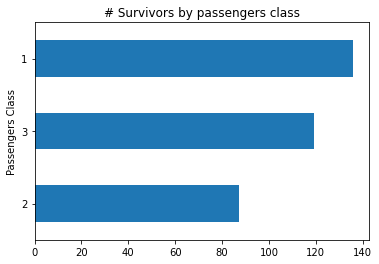

In [12]:
_ = titanic_survived.Pclass.value_counts(ascending=True).plot(xlabel='Passengers Class', \
                                                          ylabel='# Survived', kind='barh', \
                                                             title='# Survivors by passengers class')

Number of people 1st class (upper) people: 216 out of 891, 136 of them survived (62.9%) \
Number of people 2nd class (middle) people: 184 out of 891, 87 of them survived (47.3%) \
Number of people 3rd class (lower) people: 491 out of 891, 119 of them survived (24.23%)

#### Form this we can say: <b>1st class</b> was more likely to survive from Titanic disaster than other classes. 

### Investigate the `Sex` of the passengers on the number of survived

In [13]:
sex_grb = titanic.groupby('Sex')

In [14]:
cnt = sex_grb.Survived.count()
cnt

Sex
female    314
male      577
Name: Survived, dtype: int64

In [15]:
sex_grb.Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [16]:
sex_grb.Survived.value_counts() / cnt

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

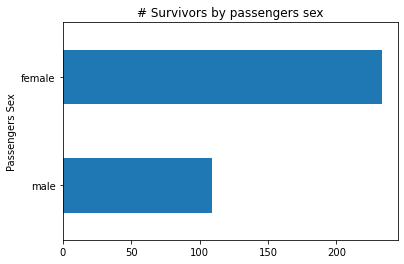

In [17]:
_ = titanic_survived.Sex.value_counts(ascending=True).plot(xlabel='Passengers Sex', \
                                                          ylabel='# Survived', kind='barh', \
                                                          title='# Survivors by passengers sex')

Number of males on Titanic: 577 out of 891, 109 of them survived (18.9%) \
Number of females on Titanic: 314 out of 891, 233 of them survived (74.2%) 

#### Form this we can say: <b>females</b> had more chane to survive from Titanic disaster than males 

### Investigate the `Age` of the passengers on the number of survived

In [18]:
titanic.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [19]:
titanic.Age.isna().sum()

177

There is missing values (NaN) ==> we will impute them with average age of all people

In [20]:
mean_age = round(titanic.Age.mean(), 2)
print(f'Average age abroad the Titanic: {mean_age}')

Average age abroad the Titanic: 29.7


In [21]:
titanic.Age.fillna(mean_age, inplace=True)
titanic.Age.isna().sum()

0

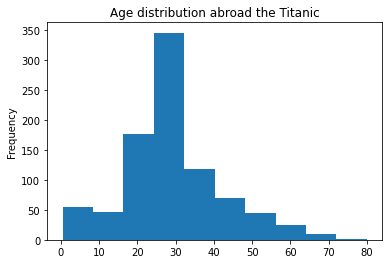

In [22]:
_ = titanic.Age.plot(xlabel='Age', kind='hist', title='Age distribution abroad the Titanic')

Classify people according to their age \
(with the help of this age classification: https://ieeexplore.ieee.org/document/6416855)

In [23]:
def classify_age(age): 
    if age > 0 and age <= 12: 
        return 'Child'
    elif age > 12 and age <= 18: 
        return 'Adolescence'
    elif age > 18 and age <= 30: 
        return 'Adult-Young Man'
    elif age > 40 and age <= 59: 
        return 'Adult-Old Man' 
    else: 
        return 'Senior Adult'

In [24]:
titanic['Age_Classification'] = titanic.Age.apply(classify_age)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Classification
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult-Young Man
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult-Young Man
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Senior Adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Senior Adult


In [25]:
titanic.Age_Classification.unique()

array(['Adult-Young Man', 'Senior Adult', 'Adult-Old Man', 'Child',
       'Adolescence'], dtype=object)

In [26]:
age_grb = titanic.groupby('Age_Classification')
cnt = age_grb.Survived.count()
cnt

Age_Classification
Adolescence         70
Adult-Old Man      124
Adult-Young Man    447
Child               69
Senior Adult       181
Name: Survived, dtype: int64

In [27]:
age_grb.Survived.value_counts(sort=False)

Age_Classification  Survived
Adolescence         0            40
                    1            30
Adult-Old Man       0            76
                    1            48
Adult-Young Man     0           299
                    1           148
Child               0            29
                    1            40
Senior Adult        0           105
                    1            76
Name: Survived, dtype: int64

In [28]:
age_grb.Survived.value_counts()/cnt

Age_Classification  Survived
Adolescence         0           0.571429
                    1           0.428571
Adult-Old Man       0           0.612903
                    1           0.387097
Adult-Young Man     0           0.668904
                    1           0.331096
Child               1           0.579710
                    0           0.420290
Senior Adult        0           0.580110
                    1           0.419890
Name: Survived, dtype: float64

C:\Users\yosse\AppData\Local\Temp/ipykernel_107160/454123164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_survived['Age_Classification'] = titanic_survived.Age.apply(classify_age)


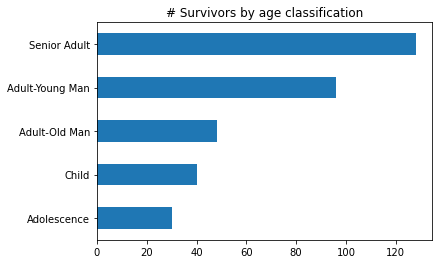

In [29]:
titanic_survived['Age_Classification'] = titanic_survived.Age.apply(classify_age)
_ = titanic_survived.Age_Classification.value_counts(ascending=True).plot(kind='barh', \
                                                                         title = '# Survivors by age classification')

#### Form this we can say: <b>Adult-Young Man (19 -> 30 years old)</b> had more chane to survive from Titanic disaster than males 

### Investigate the `Sipsp` (# of siblings/spouses aboard the Titanic) and `Parch` (# of parents/children abroad the Titanic) of the passengers on the number of survived

In [30]:
sip_grb = titanic.groupby('SibSp')
sip_grb.Survived.count()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Survived, dtype: int64

In [31]:
sip_grb.Survived.value_counts(sort=False)

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [32]:
parch_grb = titanic.groupby('Parch')
parch_grb.Survived.count()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Survived, dtype: int64

In [33]:
parch_grb.Survived.value_counts(sort=False)

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

It is thought that there is some relation between number of spouses & slibings the person had on the board of Titanic and his chance to survive, I think that who have slibings/spouses tried to survive them and couldn't survive, lets investigate more .. 

In [34]:
sib_cnt = titanic.loc[titanic.SibSp > 1].Survived.value_counts(ascending=True)
sib_cnt

1    20
0    54
Name: Survived, dtype: int64

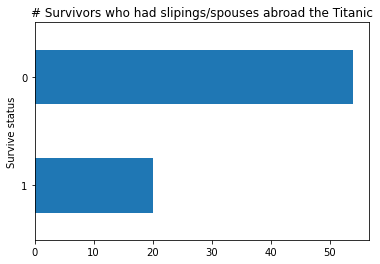

In [35]:
_ = sib_cnt.plot(ylabel='Survive status', kind='barh', title='# Survivors who had slipings/spouses abroad the Titanic')

In [36]:
parch_cnt = titanic.loc[titanic.Parch > 1].Survived.value_counts(ascending=True)
parch_cnt

1    44
0    51
Name: Survived, dtype: int64

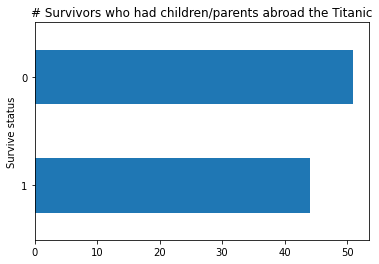

In [37]:
_ = parch_cnt.plot(ylabel='Survive status', kind='barh', title='# Survivors who had children/parents abroad the Titanic')

Form the investigation, most of the people who have slibings/spouses or children couldn't survive (I think they died trying to survive their loved ones)

In [38]:
filt_f = (titanic.Sex == 'female') & (titanic.SibSp > 1)
cnt = titanic.loc[filt_f].Survived.count()
print(f'Number of females who had slibings/spouses > 1: {str(cnt)}')
print('Percentage: ')
print(titanic.loc[filt_f].Survived.value_counts()/cnt)

Number of females who had slibings/spouses > 1: 34
Percentage: 
0    0.529412
1    0.470588
Name: Survived, dtype: float64


In [39]:
filt_m = (titanic.Sex == 'male') & (titanic.SibSp > 1)
cnt = titanic.loc[filt_m].Survived.count()
print(f'Number of males who had slibings/spouses > 1: {str(cnt)}')
print('Percentage: ')
print(titanic.loc[filt_m].Survived.value_counts()/cnt)

Number of males who had slibings/spouses > 1: 40
Percentage: 
0    0.9
1    0.1
Name: Survived, dtype: float64


#### Form this we can say: <b>who have no relationship (children, parents, spouses, slibings) </b> had more chane to survive from Titanic disaster than others

### Attributes Used:
1. <i><b>Pclass</b></i>: this attibute says the class of each passenger, which (I think) one of the first-to-head attribute to investigate as it could be there were important people in 1st class. 
2. <i><b>Sex</b></i>: it may play an important role on our decision, I think most males on the ship tried to help the females to survive, but it was too late to survive themselves. 
3. <i><b>Age</b></i>: as we see in our data, the age on Titanic was distrubted normally, so it is supposed to play a role on the survivors and their age. 
4. <i><b>sibsp & parch</b></i>: I think they can play a role on the survivorship status, as I think that who has any relationships abroad tried to survive them and may died trying to do this.  

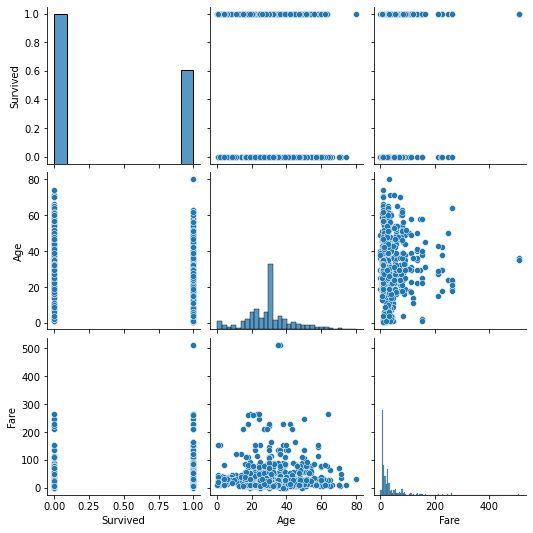

In [40]:
_ = sns.pairplot(data=titanic, vars=['Survived', 'Age', 'Fare'])

### Quick investigation on `Fare` with `Pclass`

In [41]:
class_grb.Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [42]:
titanic.loc[(titanic.Pclass == 1) & (titanic.Fare > 300)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Classification
PassengerId,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Senior Adult
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Senior Adult
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Senior Adult


#### Remove the outliers from `Fare` attribute

In [43]:
second_max = titanic.loc[titanic.Fare < titanic.Fare.max()].Fare.max()

In [44]:
titanic['Fare'] = titanic.Fare.apply(lambda x: second_max if x > second_max else x)
titanic.Fare.max()

263.0

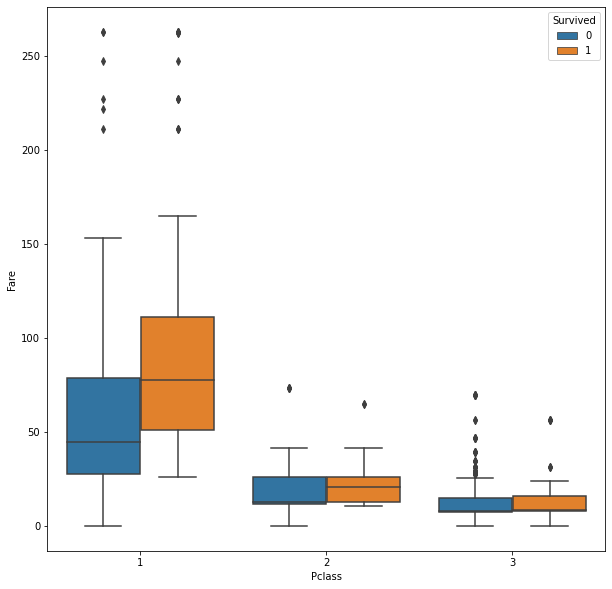

In [45]:
plt.figure(figsize=(10, 10))
_ = sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=titanic)

### Quick investigation on `Embarked` attrubute to see if there is any relation 

In [46]:
cnt = titanic.Embarked.value_counts()
cnt

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [47]:
titanic_survived.Embarked.value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [48]:
titanic_survived.Embarked.value_counts()/cnt

S    0.336957
C    0.553571
Q    0.389610
Name: Embarked, dtype: float64

#### Conclusion: I don't see any direct relationship between number of survivors and their port of embarkation.

###  Some notes on feature engineering
a. I created new attribute called `Age_Classification` which is used to classify the age as categorical data, this helped us more to know which age classification are more likely to survive than others. 

b. I didn't use `Name`, `Ticket` and `Cabin` attributes as I see that they are not for analystical use, we can't have any useful information from them. 
also for `Embarked` I see that it doesn't have any relation with the survivors. 